# Twitter Pages Analytics

We will use tweepy python library to analyze twitter pages information. To do that we install "tweepy" package using pip as illustrated below

In [2]:
#Install the latest version of "tweepy" library
!pip install tweepy

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You will have to get api keys, api secrets and authentication tokens from https://developer.twitter.com/ to be able to do these anaytics

In [3]:
#Get the tweets in the timeline at the moment of the run
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

Magoha hints at the return of corporal punishment in schools https://t.co/RNJkZ9IWLJ
RT @jensstoltenberg: Spoke with President @AndrzejDuda about the serious situation at #Poland’s border. #Belarus using migrants as a hybrid…
RT @PLinNATO: President @AndrzejDuda spoke with #NATO Secretary General @jensstoltenberg about the crisis on the 🇵🇱-🇧🇾 border.
NATO is clos…
The Nakuru senatorial race has attracted a huge field of business magnates and government technocrats and promises… https://t.co/p753ixPt3x
Tuvalu looking at legal ways to be a state if it is submerged https://t.co/P6zNtzc45u https://t.co/kHiXHov5VB
Supreme Court judges decline to withdraw from BBI case, hearing set for January https://t.co/TeDOIfJMC9
At times, I don’t understand logic &amp; narrative of CNN reports on Ethiopia. Their latest reporting is that Ethiopia… https://t.co/7n4WF8rJXf
The Nakuru senatorial race has attracted a huge field of business magnates and government technocrats and promises… https://t.co/wfT3kT

We will use Safaricom PLC official twitter page as our the first twitter user to inspect

In [4]:
#Get the information from a twitter user  (In this case we will use Safaricom PLC twitter official page)
user = api.get_user(screen_name='@safaricomPLC')

Let's print the twitter user handle and the followers account

In [5]:
#Get the basic information from the user
print(user.screen_name)
print(user.followers_count)


SafaricomPLC
1638741


Let's also print the top followers of the page

In [6]:
#Print the top followers of the twitter page/user
for friend in user.friends():
   print(friend.screen_name)

mohndirangu
sireliaph
Spanish50548739
wickie02
zakariyahji
chinmobster
ke_adolf
mwmabonga
KoshRoba
2Jerrykinyua
Nelsonbob1
DennisKimai1
JerryCollinsCJ
McCarthyWebb1
Kijanayangu
oukekennedy
Murim1Alex
Kingsaayakenya1
TAlwayo
Eddotieno


Get additional information from the twitter user

In [7]:
#Let's get some basic information about the page's info
print(user.verified) #If the user verified
print(user.location) #Location of user
print(user.screen_name) #Screen name
print(user.name) #name of user
print(user.followers_count) # The number of followers this account currently has. 
print(user.friends_count) # The number of users this account is following (AKA their “followings”)
print(user.listed_count)#The number of public lists that this user is a member of
print(user.favourites_count)#The number of Tweets this user has liked in the account’s lifetime.
print(user.statuses_count)#The number of Tweets (including retweets) issued by the user
print(user.created_at)#The UTC datetime that the user account was created on Twitter
print(user.profile_image_url_https)#A HTTPS-based URL pointing to the user’s profile image
print(user.url)#A URL provided by the user in association with their profile
print(user.id_str) #The string representation of the unique identifier for this User
print(user.description)#The user-defined UTF-8 string describing their account.

True
Kenya
SafaricomPLC
Safaricom PLC
1638741
78413
588
1542
844146
2010-02-26 08:28:15
https://pbs.twimg.com/profile_images/1320977118969368577/afmPtoso_normal.jpg
https://t.co/TGTa1s5IK2
117685967
The leading provider of converged communication solutions in Kenya. We're online 24/7 to serve you! Ask on @Safaricom_Care or #ChatWithZuri https://t.co/Piqm7EyVWW


## Analytics on top Kenyan companies' twitter handles
We will try and get insights from some top Kenyan companies' twitter handdles

In [8]:
# Let's get this information for a list of top Kenyan companies twitter handles (Replace these with your own Twitter pages)
companies = ["@safaricomPLC","@KeEquityBank","AIRTEL_KE","@TotalEnergiesKE","@KCBGroup","@KenyaAirways","@EABL_PLC","JubileeInsKE","@BritamEA"]

#Create empty lists to store the information of the above 
screen_name = [];name = [];verified=[];location=[];followers_count=[];friends_count=[];listed_count=[];favourites_count=[]
statuses_count = [];created_at = []; profile_img_url=[];url = [];id_str=[];description=[]

#Create a loop to store the different tweet info of the pages above
for i in companies:
    user = api.get_user(screen_name=i)
    
    #Extract information from the twitter user
    screen_name.append(user.screen_name)
    name.append(user.name)
    verified.append(user.verified)
    location.append(user.location)
    followers_count.append(user.followers_count)
    friends_count.append(user.friends_count)
    listed_count.append(user.listed_count)
    favourites_count.append(user.favourites_count)
    statuses_count.append(user.statuses_count)
    created_at.append(user.created_at)
    profile_img_url.append(user.profile_image_url_https)
    url.append(user.url)
    id_str.append(user.id_str)
    description.append(user.description)

#Create a dictionary using the lists    
tweet_dict = {'screen_name':screen_name, 'name':name, 'verified':verified,'location':location,
             'followers_count':followers_count, 'friends_count':friends_count,'listed_count':listed_count,
             'favourites_count':favourites_count, 'statuses_count':statuses_count, 'created_at':created_at,
             'profile_img_url':profile_img_url, 'url':url, 'id_str':id_str, 'description':description}

#Use pandas to convert the dictionary to a pandas dataframe
import pandas as pd

tweet_df = pd.DataFrame.from_dict(tweet_dict)

#View the top rows of the created dataframe
tweet_df
    

,screen_name,name,verified,location,followers_count,friends_count,listed_count,favourites_count,statuses_count,created_at,profile_img_url,url,id_str,description
0,SafaricomPLC,Safaricom PLC,True,Kenya,1638743,78413,588,1542,844148,2010-02-26 08:28:15,https://pbs.twimg.com/profile_images/132097711...,https://t.co/TGTa1s5IK2,117685967,The leading provider of converged communicatio...
1,KeEquityBank,Equity Bank Kenya,True,KENYA,317622,8530,160,714,220021,2012-11-05 08:10:55,https://pbs.twimg.com/profile_images/139171587...,https://t.co/GGQHtA8jWs,927151099,Official twitter page for Equity Bank Kenya – ...
2,AIRTEL_KE,Airtel Kenya,True,Kenya,486746,8684,205,366,997591,2010-09-17 08:50:27,https://pbs.twimg.com/profile_images/783660189...,https://t.co/uBs8x5assX,191765987,Get in touch. Speak from the heart. Seal the d...
3,TotalEnergiesKE,TotalEnergies Kenya,True,Kenya,31329,1482,26,3761,16112,2012-08-07 08:01:08,https://pbs.twimg.com/profile_images/140040961...,https://t.co/K6WU4avlIH,742426236,TotalEnergies is a broad energy company that p...
4,KCBGroup,KCB Group,True,East Africa,484791,21479,225,8040,282117,2010-10-10 20:11:48,https://pbs.twimg.com/profile_images/111155295...,https://t.co/qpf3uuxnuL,200988657,KCB Group is banking on you to be here for lif...
5,KenyaAirways,Kenya Airways,True,"Nairobi,Kenya",850507,7092,1256,21229,71940,2008-12-31 00:19:13,https://pbs.twimg.com/profile_images/110508838...,None,18493366,"Africa's Leading Airline, The Pride Of Africa!"
6,EABL_PLC,East African Breweries PLC,True,Kenya,8161,36,7,269,796,2019-01-25 09:44:23,https://pbs.twimg.com/profile_images/120540597...,https://t.co/JXusK94i2H,1088734316606251009,Official EABL Page. Africa's leading branded a...
7,JubileeInsKE,Jubilee Insurance,True,"Nairobi, Kenya",18869,1035,32,1908,15951,2012-01-17 17:35:37,https://pbs.twimg.com/profile_images/786207595...,https://t.co/bcaSsUYf4S,466680439,Jubilee is the number one insurer in East Afri...
8,BritamEA,Britam Cares,True,East & Southern Africa,25805,1228,66,1802,10317,2010-11-04 08:09:45,https://pbs.twimg.com/profile_images/378800000...,https://t.co/jC07s0idXd,211791426,Britam is a leading diversified financial serv...


## Data Visualization
We will visualize 'followers count','favourites count' and 'statuses count' of the various twitter handles 

<AxesSubplot:ylabel='name'>

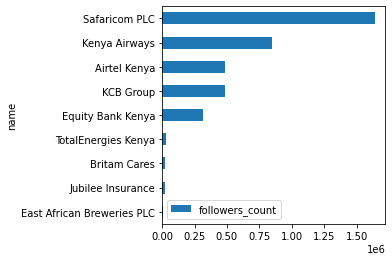

In [9]:
#Lets visualize some of the metrics

#Followers count
tweet_df.sort_values(by=['followers_count']).plot.barh(x='name',y='followers_count', figsize=(4, 4), rot=0)

<AxesSubplot:ylabel='name'>

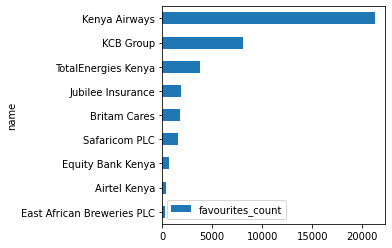

In [10]:
tweet_df.sort_values(by=['favourites_count']).plot.barh(x='name',y='favourites_count', figsize=(4, 4), rot=0)

<AxesSubplot:ylabel='name'>

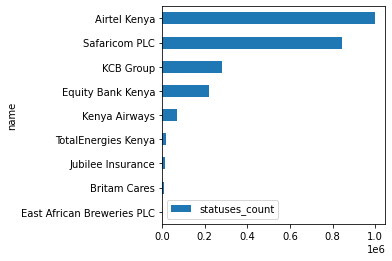

In [11]:
#df.sort_values(by=['col1'])
tweet_df.sort_values(by=['statuses_count']).plot.barh(x='name',y='statuses_count', figsize=(4, 4), rot=0)

In [29]:
#Once we are satisfied with our results, we can download the data as csv or excel
tweet_df.to_csv('tweets_info.csv')
